In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import warnings
import pandas as pd

from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from spacy.tokens.doc import Doc
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_md
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

In [3]:
df=pd.read_csv('../data/sample30.csv')
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [17]:
df.shape

(30000, 15)

In [18]:
df.name.value_counts().count()

271

### Data cleaning

let's check how is the data about

In [19]:
df.user_sentiment.value_counts(normalize=True)

Positive                   0.89
Negative                   0.11
Name: user_sentiment, dtype: float64

In [20]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [21]:
## reviews_userProvince, reviews_userCity, reviews_doRecommend, reviews_didPurchase, reviews_date 'id', 'brand', 'categories', 'manufacturer', 'name',
 ##       'reviews_rating',are not required dropping them
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [22]:
df=df[['reviews_text', 'reviews_title',  'user_sentiment']]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_text    30000 non-null  object
 1   reviews_title   29810 non-null  object
 2   user_sentiment  29999 non-null  object
dtypes: object(3)
memory usage: 703.2+ KB


In [24]:
# as their is very small number of nan hence dropping it
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29809 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_text    29809 non-null  object
 1   reviews_title   29809 non-null  object
 2   user_sentiment  29809 non-null  object
dtypes: object(3)
memory usage: 931.5+ KB


In [25]:
## let's convert Positive to 1 and Negative to 0
convert={"Positive":1,"Negative":0}
df.user_sentiment=df.user_sentiment.apply(lambda x:convert[x])

In [26]:
df.head()

,reviews_text,reviews_title,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,1
1,Good flavor. This review was collected as part of a promotion.,Good,1
2,Good flavor.,Good,1
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,0
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,0


In [27]:
# creating another column as review which is reviews_text + reviews_title
df['review']=df.apply(lambda x: x['reviews_text'] +" "+ x['reviews_title'],axis=1)

In [28]:
df.head()

,reviews_text,reviews_title,user_sentiment,review
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,1,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy. Just Awesome
1,Good flavor. This review was collected as part of a promotion.,Good,1,Good flavor. This review was collected as part of a promotion. Good
2,Good flavor.,Good,1,Good flavor. Good
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,0,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess. Disappointed"
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,0,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel. Irritation


In [29]:
def clean_review(review):
    review = BeautifulSoup(review, "lxml").get_text()
    # Removing the @
    review = re.sub(r"@[A-Za-z0-9]+", ' ', review)
    # Removing the URL links
    review = re.sub(r"https?://[A-Za-z0-9./]+", ' ', review)
    # Keeping only letters
    review = re.sub(r"[^a-zA-Z.!?']", ' ', review)
    # Removing additional whitespaces
    review = re.sub(r" +", ' ', review)
    return review

In [30]:
## general clean of review
df.review = [clean_review(review) for review in df.review]

In [31]:
df.head()

,reviews_text,reviews_title,user_sentiment,review
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,1,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it star rating all the way. her metaphors are just crazy. Just Awesome
1,Good flavor. This review was collected as part of a promotion.,Good,1,Good flavor. This review was collected as part of a promotion. Good
2,Good flavor.,Good,1,Good flavor. Good
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,0,I read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice however was the messy consistency that was reminiscent of a more liquid y vaseline. It was difficult to clean up and was not a pleasant especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again when I could just use their normal personal lubricant for less money and less mess. Disappointed
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,0,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel. Irritation


## Exploratory data analysis

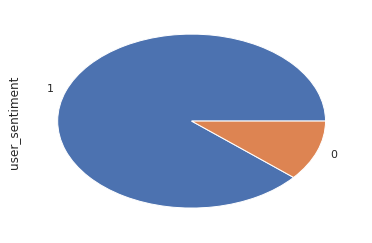

In [32]:
df.user_sentiment.value_counts(normalize=True).plot.pie()

Dataset is imbalanced we have to balance it

In [33]:
p_title=df.reviews_title[df.user_sentiment==1]
n_title=df.reviews_title[df.user_sentiment==0]

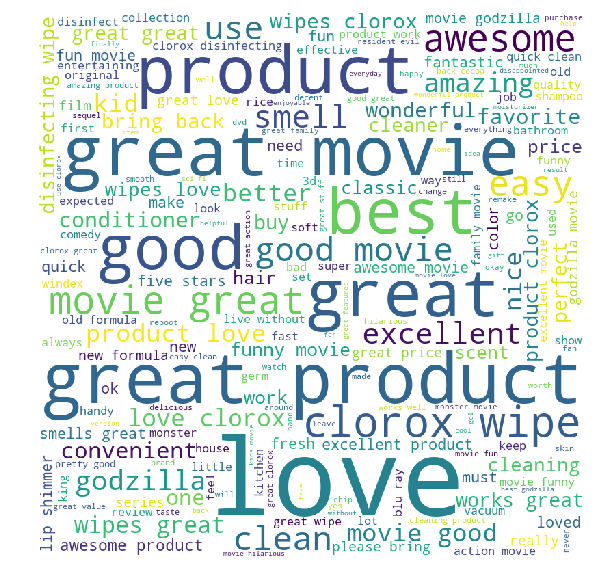

In [34]:
## positive title word cloud
comment_words = ''
stopwords = set(STOPWORDS)
  
for val in p_title:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

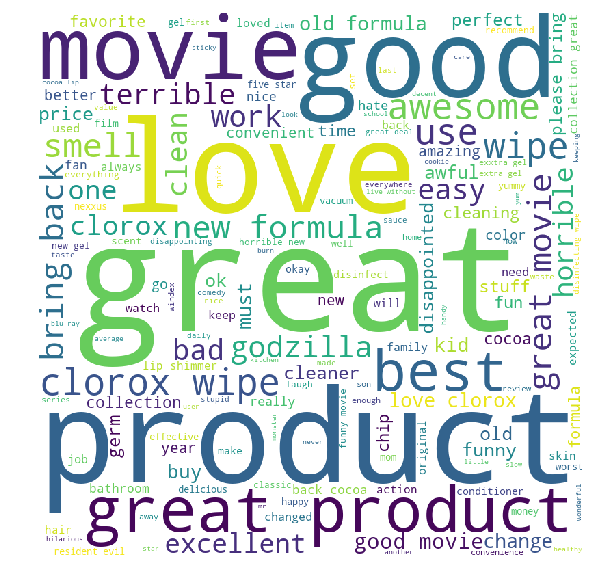

In [35]:
## neagative title word cloud
comment_words = ''
stopwords = set(STOPWORDS)
  
for val in n_title:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

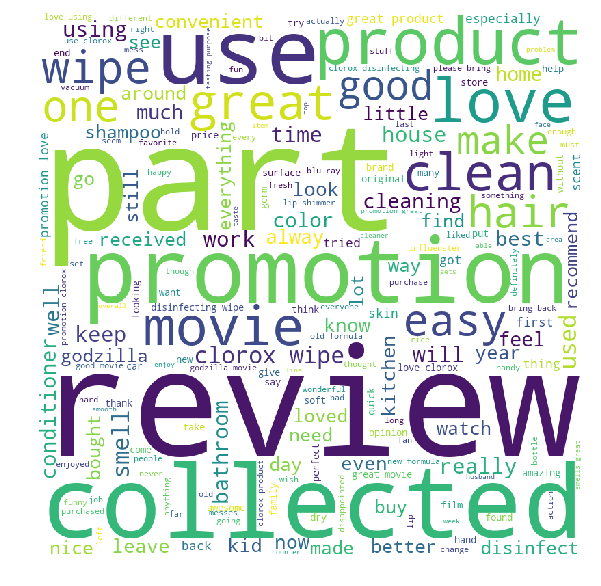

In [36]:
## review word cloud
comment_words = ''
stopwords = set(STOPWORDS)
  
for val in df.reviews_text:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Text preprocessing and Feature extraction

In [37]:
df.head()

,reviews_text,reviews_title,user_sentiment,review
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,1,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it star rating all the way. her metaphors are just crazy. Just Awesome
1,Good flavor. This review was collected as part of a promotion.,Good,1,Good flavor. This review was collected as part of a promotion. Good
2,Good flavor.,Good,1,Good flavor. Good
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,0,I read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice however was the messy consistency that was reminiscent of a more liquid y vaseline. It was difficult to clean up and was not a pleasant especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again when I could just use their normal personal lubricant for less money and less mess. Disappointed
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,0,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel. Irritation


In [38]:
## only review and  user_sentiment is required for sentiment analysis
df_req=df[['review','user_sentiment']]

In [39]:
df_req.head()

,review,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it star rating all the way. her metaphors are just crazy. Just Awesome,1
1,Good flavor. This review was collected as part of a promotion. Good,1
2,Good flavor. Good,1
3,I read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice however was the messy consistency that was reminiscent of a more liquid y vaseline. It was difficult to clean up and was not a pleasant especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again when I could just use their normal personal lubricant for less money and less mess. Disappointed,0
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel. Irritation,0


In [40]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_md')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()


In [41]:
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [42]:
## lets also create tfidf
tfidf_vectoriser = TfidfVectorizer(tokenizer = spacy_tokenizer)
vector_tfidf=tfidf_vectoriser.fit_transform(df.review)

In [43]:
vector_tfidf=vector_tfidf.toarray()

In [44]:
tokenised_output=df.review.apply(spacy_tokenizer)

In [45]:
tokenised_output

0        [love, album, good, hip, hop, current, pop, sound, .., hype, listen, everyday, gym, star, rating, way, metaphors, crazy, awesome]                                                                                                                                                                                                                                                                                     
1        [good, flavor, review, collected, promotion, good]                                                                                                                                                                                                                                                                                                                                                                    
2        [good, flavor, good]                                                                                                                                           

In [46]:
## let's crete the vector from spacy pre-train embeddings
vector_embedding = en_core_web_md.load()



In [47]:
def get_vector(sentence):
    doc = vector_embedding(sentence)
    return np.asarray(doc.vector)

In [48]:
vector_output=[]
for sentence in tqdm(tokenised_output):
    vector_output.append(get_vector(' '.join(sentence)))

vector_output=np.asarray(vector_output)

100%|██████████| 29809/29809 [03:07<00:00, 158.95it/s]


In [49]:
len(vector_output)

29809

In [50]:
vector_output[0]

array([-2.07406841e-02,  2.12516785e-01, -7.22859502e-02,  2.20223311e-02,
        1.71568558e-01,  1.01982065e-01, -8.06000009e-02, -2.42386490e-01,
        3.53889503e-02,  1.63523686e+00, -1.30200177e-01, -3.97285819e-02,
        3.82799916e-02,  4.97000962e-02, -1.20175267e-02, -2.88879424e-02,
       -4.29219455e-02,  7.91683674e-01, -1.44544557e-01, -4.04479727e-02,
        7.50395358e-02,  2.75199972e-02,  6.66415021e-02, -1.25022292e-01,
       -4.96701561e-02,  2.47537461e-03, -3.41757536e-02, -2.72226334e-02,
        1.43057257e-01, -1.18462384e-01,  6.47473335e-02,  6.79447204e-02,
       -8.02777931e-02,  7.15586916e-02, -2.04357952e-02,  1.10572524e-01,
        9.84660611e-02,  1.03091054e-01, -5.12499437e-02,  5.07289497e-03,
       -7.14389682e-02,  1.17817938e-01, -1.54220462e-01,  1.76512107e-01,
       -2.63570491e-02,  6.51148409e-02, -8.84297624e-05,  9.95326266e-02,
       -2.04947338e-01,  6.84556365e-03, -1.50282666e-01,  2.90352982e-02,
        4.20712605e-02, -

In [51]:
vector_output[0].shape

(300,)

In [52]:
USER_SENTIMENT=df_req.user_sentiment

In [53]:
len(USER_SENTIMENT) ## this is Y

29809

In [54]:
len(vector_output) ## this is X

29809

## Splitting The Data into Training and Test Sets


In [55]:

## with spacy_embeddings
X_train, X_test, y_train, y_test = train_test_split(vector_output, USER_SENTIMENT, test_size=0.3)


##with tfidf

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(vector_tfidf, USER_SENTIMENT, test_size=0.3)


## Handeling Imbalance Problem

In [56]:
y_train.value_counts(normalize=True)

1                   0.89
0                   0.11
Name: user_sentiment, dtype: float64

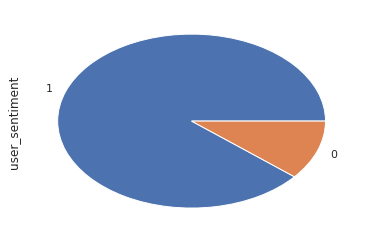

In [57]:
y_train.value_counts(normalize=True).plot.pie()

In [58]:
counter=Counter(y_train)
print("before",counter)

## oversampling the train dataset using SMOTE
smt=SMOTE()

x_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

counter=Counter(y_train_sm)
print("after",counter)

before Counter({1: 18558, 0: 2308})
after Counter({1: 18558, 0: 18558})


In [59]:
counter=Counter(y_train_tfidf)
print("before",counter)

## oversampling the train dataset using SMOTE
smt=SMOTE()

x_train_sm_tfidf,y_train_sm_tfidf=smt.fit_resample(X_train_tfidf,y_train_tfidf)

counter=Counter(y_train_sm_tfidf)
print("after",counter)

before Counter({1: 18531, 0: 2335})
after Counter({1: 18531, 0: 18531})


## Modeling

In [60]:
## let's first start with simple LogisticRegression

learner_logistic = LogisticRegression()
model_logistic= learner_logistic.fit(x_train_sm, y_train_sm)

In [61]:
## Let's Evaluate this Model
y_pred=model_logistic.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.74      0.46      1037
           1       0.96      0.81      0.88      7906

    accuracy                           0.80      8943
   macro avg       0.65      0.78      0.67      8943
weighted avg       0.89      0.80      0.83      8943



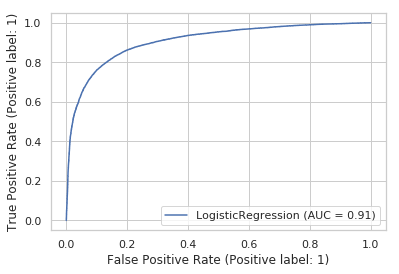

In [63]:
plot_roc_curve(model_logistic, x_train_sm, y_train_sm)
plt.show()

In [64]:
recall=metrics.recall_score(y_test, y_pred)
precision=metrics.precision_score(y_test, y_pred)
accuracy=metrics.accuracy_score(y_test, y_pred)

In [65]:
results = pd.DataFrame({'Method':['LogisticRegression'], 'recall': [recall],'precision': [precision],'accuracy':[accuracy] })
results = results[['Method', 'recall', 'precision','accuracy']]
results

,Method,recall,precision,accuracy
0,LogisticRegression,0.81,0.96,0.80


In [66]:
## let's try Random forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [67]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [68]:
MAX_CV_FOLDS=5
cv_splits = max(2, min(MAX_CV_FOLDS, np.min(np.bincount(y_train_sm)) // 5))

In [70]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = cv_splits,
                           n_jobs=-1, verbose=2, scoring="accuracy")

In [71]:
%%time
grid_search.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
CPU times: user 1min 31s, sys: 1.04 s, total: 1min 33s
Wall time: 10min 42s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=2)

In [72]:
grid_search.best_score_

0.9406188013025684

In [73]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

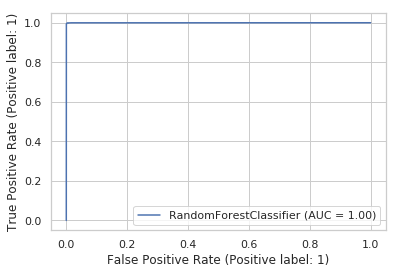

In [74]:
plot_roc_curve(rf_best, x_train_sm, y_train_sm)
plt.show()

In [75]:
## Let's Evaluate this Model
y_pred=rf_best.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.41      0.43      1037
           1       0.92      0.93      0.93      7906

    accuracy                           0.87      8943
   macro avg       0.68      0.67      0.68      8943
weighted avg       0.87      0.87      0.87      8943



In [77]:
recall=metrics.recall_score(y_test, y_pred)
precision=metrics.precision_score(y_test, y_pred)
accuracy=metrics.accuracy_score(y_test, y_pred)

In [78]:
tempResults = pd.DataFrame({'Method':['Random forest'], 'recall': [recall],'precision': [precision],'accuracy':[accuracy] })
results = pd.concat([results, tempResults])
results = results[['Method', 'recall', 'precision','accuracy']]
results

,Method,recall,precision,accuracy
0,LogisticRegression,0.81,0.96,0.80
0,Random forest,0.93,0.92,0.87


In [79]:
## let's now try xgboost
tuned_parameters = {'learning_rate': [0.1],
                                'max_depth': [ 10, 12],
                                'min_child_weight': [3],
                                'n_estimators': [100]}
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [80]:
clf = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic'),
                                    param_grid=tuned_parameters,
                                    n_jobs=-1,
                                    cv=cv_splits,
                                    scoring=scorer,
                                    refit=True, verbose=2, return_train_score=True)
clf

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, us

In [81]:
%%time
clf.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[10:56:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 11min 44s, sys: 109 ms, total: 11min 44s
Wall time: 49min 16s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, us

In [82]:
clf.best_score_

0.9937627716671343

In [83]:
xg_best = clf.best_estimator_
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

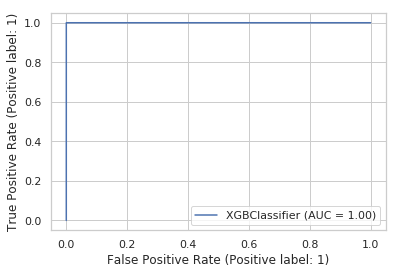

In [84]:
plot_roc_curve(xg_best, x_train_sm, y_train_sm)
plt.show()

In [85]:
## Let's Evaluate this Model
y_pred=xg_best.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      1037
           1       0.93      0.94      0.93      7906

    accuracy                           0.88      8943
   macro avg       0.71      0.70      0.71      8943
weighted avg       0.88      0.88      0.88      8943



In [87]:
recall=metrics.recall_score(y_test, y_pred)
precision=metrics.precision_score(y_test, y_pred)
accuracy=metrics.accuracy_score(y_test, y_pred)

In [88]:
tempResults = pd.DataFrame({'Method':['XGBClassifier'], 'recall': [recall],'precision': [precision],'accuracy':[accuracy] })
results = pd.concat([results, tempResults])
results = results[['Method', 'recall', 'precision','accuracy']]
results

,Method,recall,precision,accuracy
0,LogisticRegression,0.81,0.96,0.80
0,Random forest,0.93,0.92,0.87
0,XGBClassifier,0.94,0.93,0.88


In [89]:
## let's try Naive Bayes
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv_splits,
                     n_jobs=-1,
                 verbose=2, 
                 scoring='accuracy')
gs_NB

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [90]:
%%time
gs_NB.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 3.69 s, sys: 1.05 s, total: 4.74 s
Wall time: 22.4 s


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [91]:
gs_NB.best_score_

0.6945805129501966

In [92]:
nb_best = gs_NB.best_estimator_
nb_best

GaussianNB(var_smoothing=0.0002310129700083158)

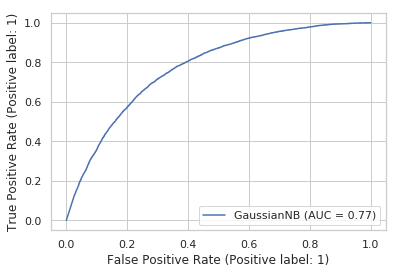

In [93]:
plot_roc_curve(nb_best, x_train_sm, y_train_sm)
plt.show()

In [94]:
## Let's Evaluate this Model
y_pred=nb_best.predict(X_test)

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.64      0.28      1037
           1       0.93      0.62      0.74      7906

    accuracy                           0.62      8943
   macro avg       0.55      0.63      0.51      8943
weighted avg       0.84      0.62      0.69      8943



In [96]:
recall=metrics.recall_score(y_test, y_pred)
precision=metrics.precision_score(y_test, y_pred)
accuracy=metrics.accuracy_score(y_test, y_pred)

In [97]:
tempResults = pd.DataFrame({'Method':['Naive Bayes'], 'recall': [recall],'precision': [precision],'accuracy':[accuracy] })
results = pd.concat([results, tempResults])
results = results[['Method', 'recall', 'precision','accuracy']]
results

,Method,recall,precision,accuracy
0,LogisticRegression,0.81,0.96,0.80
0,Random forest,0.93,0.92,0.87
0,XGBClassifier,0.94,0.93,0.88
0,Naive Bayes,0.62,0.93,0.62


In [102]:
## let's try with svm
tuned_parameters = [{"C": [
                1
                
               
            ],
                                 "gamma":  [
               
                0.0001,
                0.1
            ],
                                 "kernel": ["rbf"]

                                 }]
clf_svm = GridSearchCV(SVC(C=1, probability=True, class_weight='balanced'),
                                    param_grid=tuned_parameters, n_jobs=-1, return_train_score=True,
                                    cv=cv_splits, scoring='accuracy', verbose=2)
clf_svm

GridSearchCV(cv=5,
             estimator=SVC(C=1, class_weight='balanced', probability=True),
             n_jobs=-1,
             param_grid=[{'C': [1], 'gamma': [0.0001, 0.1], 'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [103]:
%%time
clf_svm.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 11min 38s, sys: 1.43 s, total: 11min 40s
Wall time: 1h 17min 7s


GridSearchCV(cv=5,
             estimator=SVC(C=1, class_weight='balanced', probability=True),
             n_jobs=-1,
             param_grid=[{'C': [1], 'gamma': [0.0001, 0.1], 'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [104]:
clf_svm.best_score_

0.8865181887493208

In [105]:
svm_best = clf_svm.best_estimator_
svm_best

SVC(C=1, class_weight='balanced', gamma=0.1, probability=True)

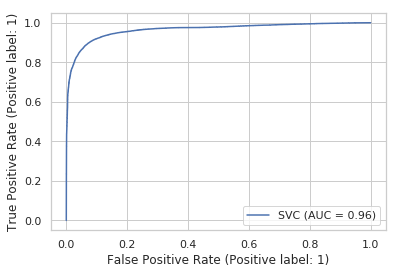

In [111]:
plot_roc_curve(svm_best, x_train_sm, y_train_sm)
plt.show()

In [107]:
## Let's Evaluate this Model
y_pred=svm_best.predict(X_test)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.75      0.51      1037
           1       0.96      0.85      0.90      7906

    accuracy                           0.84      8943
   macro avg       0.68      0.80      0.71      8943
weighted avg       0.90      0.84      0.86      8943



In [109]:
recall=metrics.recall_score(y_test, y_pred)
precision=metrics.precision_score(y_test, y_pred)
accuracy=metrics.accuracy_score(y_test, y_pred)

In [110]:
tempResults = pd.DataFrame({'Method':['SVM'], 'recall': [recall],'precision': [precision],'accuracy':[accuracy] })
results = pd.concat([results, tempResults])
results = results[['Method', 'recall', 'precision','accuracy']]
results

,Method,recall,precision,accuracy
0,LogisticRegression,0.81,0.96,0.80
0,Random forest,0.93,0.92,0.87
0,XGBClassifier,0.94,0.93,0.88
0,Naive Bayes,0.62,0.93,0.62
0,SVM,0.85,0.96,0.84


## Conclusion

with taking consideration with all parameters I would go with SVM_RBF and vector from pretrained ``` en_core_web_md ```